In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [16, 8]
pd.set_option('display.max_columns', None)

In [4]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
print('Train shape:', train_df.shape)
print('Test shape:', test_df.shape)

Train shape: (22005, 30)
Test shape: (6000, 29)


In [11]:
# number_of_dependences is enough, add male / female will be redundant
train_df = train_df.drop(['number_of_dependences (male)', 'number_of_dependences (female)'], axis=1)
test_df = test_df.drop(['number_of_dependences (male)', 'number_of_dependences (female)'], axis=1)

train_df['age'] = 2020 - train_df['age']
test_df['age'] = 2020 - test_df['age']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22005 entries, 0 to 22004
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              22005 non-null  object 
 1   job_duration_in_current_job_level      22005 non-null  float64
 2   person_level                           22005 non-null  object 
 3   job_duration_in_current_person_level   22005 non-null  float64
 4   job_duration_in_current_branch         22005 non-null  float64
 5   Employee_type                          21993 non-null  object 
 6   Employee_status                        22005 non-null  object 
 7   gender                                 22005 non-null  object 
 8   age                                    22005 non-null  int64  
 9   marital_status_maried(Y/N)             22005 non-null  object 
 10  number_of_dependences                  22005 non-null  int64  
 11  Ed

KeyError: "['number_of_dependences (male)' 'number_of_dependences (female)'] not found in axis"

In [12]:
null_col = train_df.columns[train_df.isna().any()]

null_df = train_df[null_col].isna().sum().rename('missing rows').to_frame()
null_df['percentage'] = round(null_df['missing rows'] / train_df.shape[0] * 100, 3)
null_df['percentage'] = null_df['percentage'].astype('str')

null_df.sort_values('missing rows', ascending=False).style.background_gradient('Blues')

,missing rows,percentage
achievement_target_1,6727,30.57
achievement_target_2,6727,30.57
achievement_target_3,6727,30.57
Last_achievement_%,6302,28.639
Achievement_above_100%_during3quartal,6302,28.639
Avg_achievement_%,6289,28.58
Education_level,3608,16.396
GPA,3503,15.919
year_graduated,3503,15.919
job_duration_as_permanent_worker,2055,9.339


In [13]:
if test_df.isna().any().sum() == 0:
    print('Test dataset does not have missing values')
else:
    print('Test dataset have missing values')

Test dataset does not have missing values


In [14]:
print('Total duplicated rows:', train_df.duplicated().sum())

train_df.drop_duplicates(inplace=True)

Total duplicated rows: 123


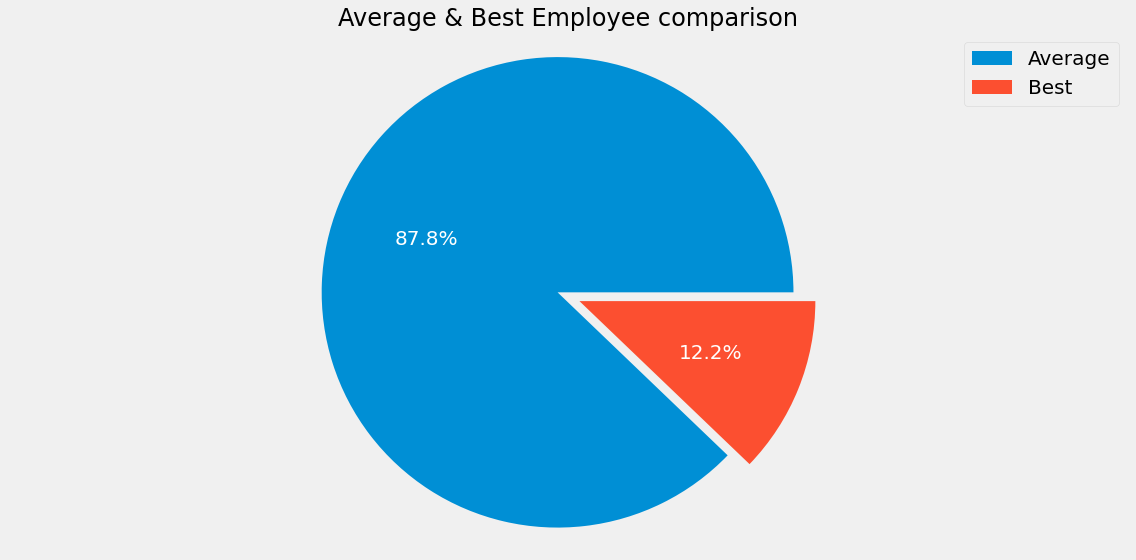

In [15]:
best_performance_comparison = train_df['Best Performance'].value_counts()

plt.pie(best_performance_comparison.values,
        labels=best_performance_comparison.index,
        autopct='%.1f%%',
        textprops={'fontsize': 20, 'color': 'white'},
        labeldistance=None,
        explode=(0.1, 0)
)

plt.title('Average & Best Employee comparison', fontsize=24)
plt.legend(['Average', 'Best'], fontsize=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

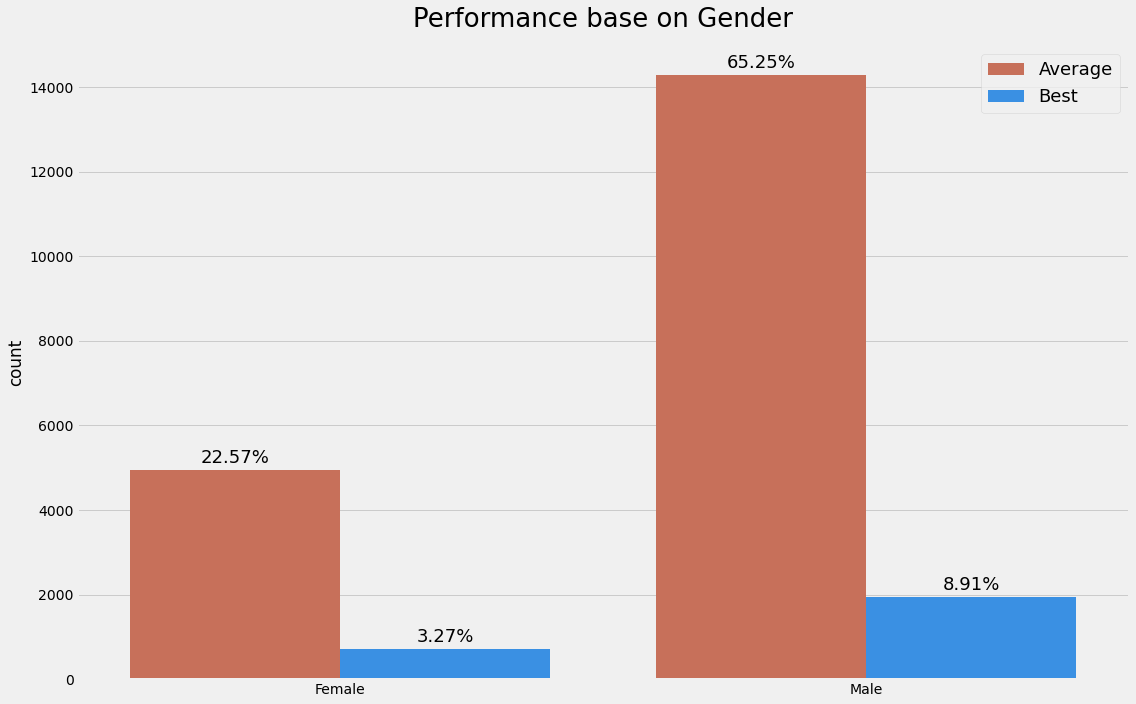

In [16]:
plt.figure(figsize=(16, 10))
axes = sns.countplot(train_df['gender'], hue=train_df['Best Performance'], palette=['#d96548', 'dodgerblue'])
axes.set_title('Performance base on Gender', fontsize=26, pad=18)

for val in axes.patches:
    pct = '{:.2f}%'.format(100 * val.get_height() / train_df.shape[0])
    xpos = val.get_x() + val.get_width() / 2.
    ypos = val.get_height()
    axes.annotate(pct, (xpos, ypos), ha='center', va='center', fontsize=18, xytext=(0, 12), textcoords='offset points')

axes.set_xlabel(None)

plt.legend(['Average', 'Best'], fontsize=18)
plt.tight_layout()
plt.show()

In [17]:
print("Best Female at work", round(3.27 / (22.57 + 3.27), 3))
print("Best Male at work", round(8.91 / (65.25 + 8.91), 3))


Best Female at work 0.127
Best Male at work 0.12


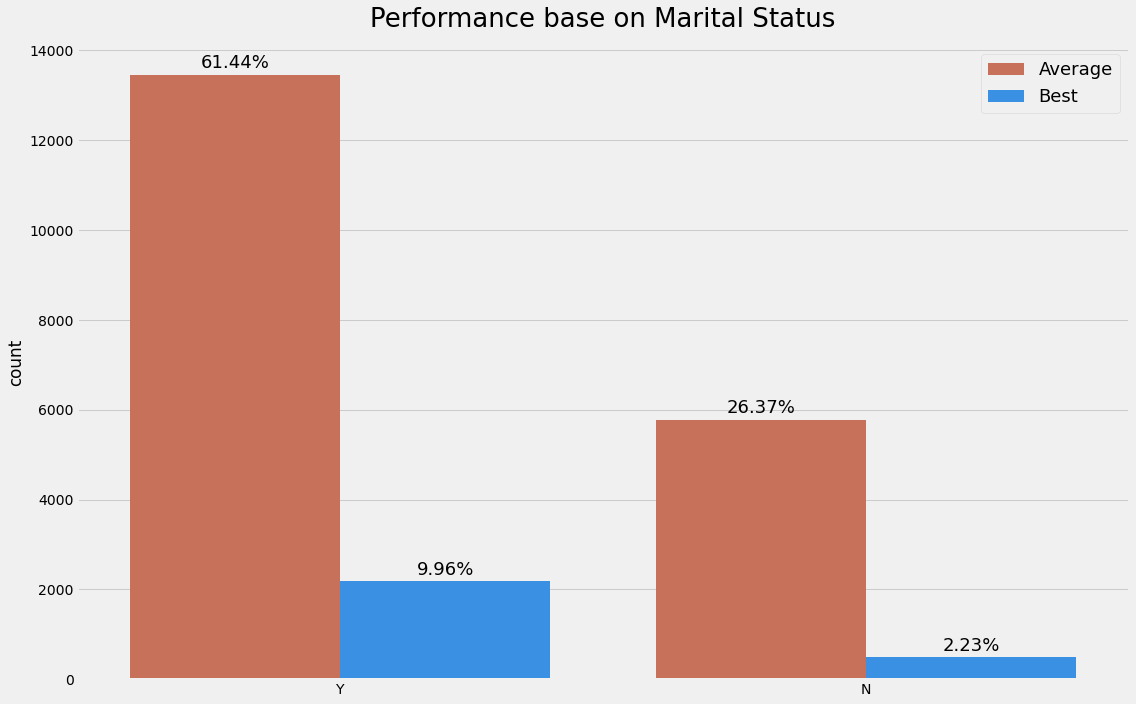

In [18]:
plt.figure(figsize=(16, 10))
axes = sns.countplot(train_df['marital_status_maried(Y/N)'], hue=train_df['Best Performance'], palette=['#d96548', 'dodgerblue'])
axes.set_title('Performance base on Marital Status', fontsize=26, pad=18)

for val in axes.patches:
    pct = '{:.2f}%'.format(100 * val.get_height() / train_df.shape[0])
    xpos = val.get_x() + val.get_width() / 2.
    ypos = val.get_height()
    axes.annotate(pct, (xpos, ypos), ha='center', va='center', fontsize=18, xytext=(0, 12), textcoords='offset points')

axes.set_xlabel(None)

plt.legend(['Average', 'Best'], fontsize=18)
plt.tight_layout()
plt.show()

In [19]:
print("Already married at work", round(9.96 / (61.44 + 9.96), 3))
print("Have not married at work", round(2.23 / (26.37 + 2.23), 3))


Already married at work 0.139
Have not married at work 0.078


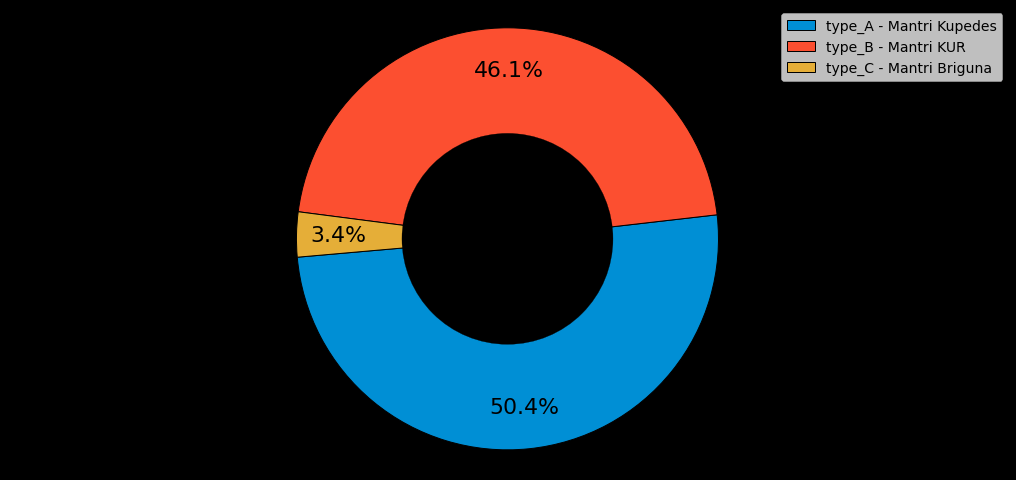

In [20]:
emp_count = train_df['Employee_type'].value_counts()

fig = plt.figure()
fig.patch.set_facecolor('black')

plt.pie(emp_count.values,
        labels=emp_count.index,
        autopct='%1.1f%%',
        pctdistance=0.8,
        textprops={'color': 'black', 'fontsize': 22},
        wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
        labeldistance=None,
        startangle=185
)

centre_circle = plt.Circle((0, 0), 0.5, edgecolor='black',
                           facecolor='black', fill=True, linewidth=0.25)

p = plt.gcf()
p.gca().add_artist(centre_circle)

plt.legend(['type_A - Mantri Kupedes', 'type_B - Mantri KUR', 'type_C - Mantri Briguna'])
plt.axis('equal')
plt.show()


In [21]:
train_df.groupby('Employee_type')['Best Performance'].mean().round(3).sort_values(ascending=False).multiply(100)

Employee_type
RM_type_A    14.1
RM_type_C    12.4
RM_type_B    10.1
Name: Best Performance, dtype: float64

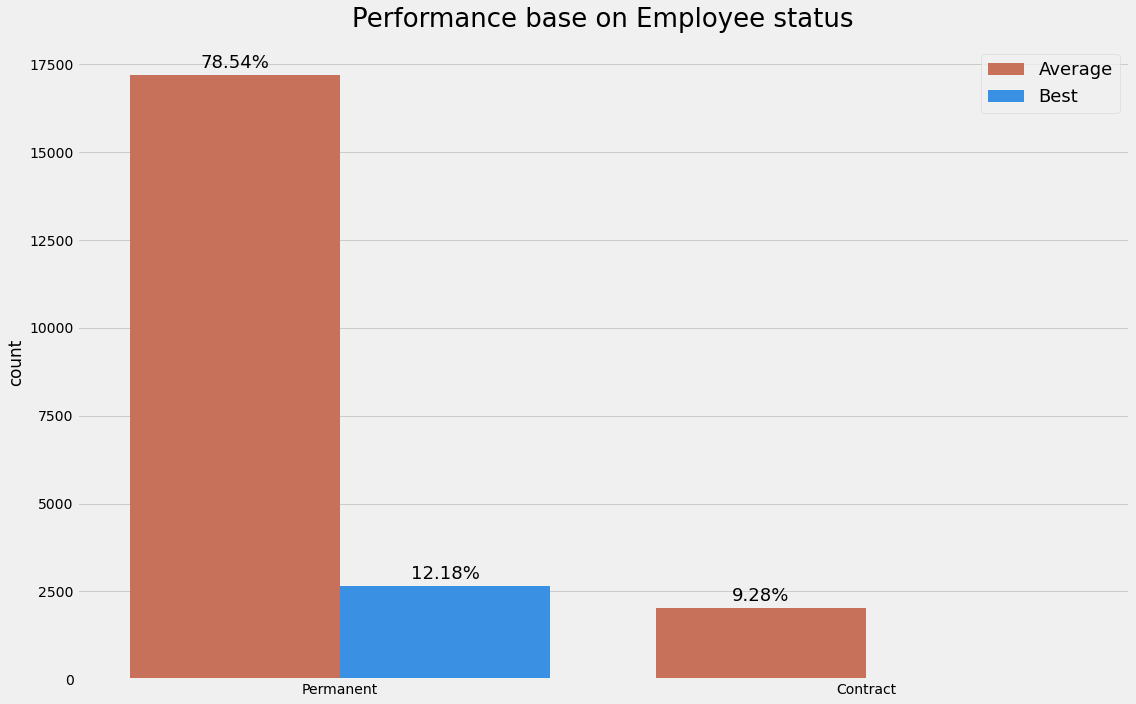

In [22]:
plt.figure(figsize=(16, 10))
axes = sns.countplot(train_df['Employee_status'], hue=train_df['Best Performance'], palette=['#d96548', 'dodgerblue'])
axes.set_title('Performance base on Employee status', fontsize=26, pad=18)

for val in axes.patches:
    pct = '{:.2f}%'.format(100 * val.get_height() / train_df.shape[0])
    xpos = val.get_x() + val.get_width() / 2.
    ypos = val.get_height()
    axes.annotate(pct, (xpos, ypos), ha='center', va='center', fontsize=18, xytext=(0, 12), textcoords='offset points')
    
axes.set_xlabel(None)

plt.legend(['Average', 'Best'], fontsize=18, loc=1)
plt.tight_layout()
plt.show()


In [23]:
train_df[train_df['Employee_status'] == 'Contract']['Best Performance'].sum()

0

In [24]:
ed_level = train_df.groupby('Education_level').size().sort_values(ascending=False)
ed_level.rename(index={'level_0': 'Internal course',
                       'level_1': 'SLTA',
                       'level_2': 'D1',
                       'level_3': 'D3/D4',
                       'level_4': 'S1',
                       'level_5': 'S2'}, inplace=True)

ed_level

Education_level
S1                 15192
D3/D4               2802
SLTA                 192
S2                    64
Internal course       16
D1                     8
dtype: int64

In [25]:
ed_level_perform = train_df.groupby('Education_level')['Best Performance'].mean().round(3).sort_values(ascending=False).multiply(100)

ed_level_perform.rename(index={'level_0': 'Internal course',
                       'level_1': 'SLTA',
                       'level_2': 'D1',
                       'level_3': 'D3/D4',
                       'level_4': 'S1',
                       'level_5': 'S2'}, inplace=True)

ed_level_perform

Education_level
SLTA               17.7
S2                 15.6
S1                 11.5
D3/D4              11.5
Internal course     6.2
D1                  0.0
Name: Best Performance, dtype: float64

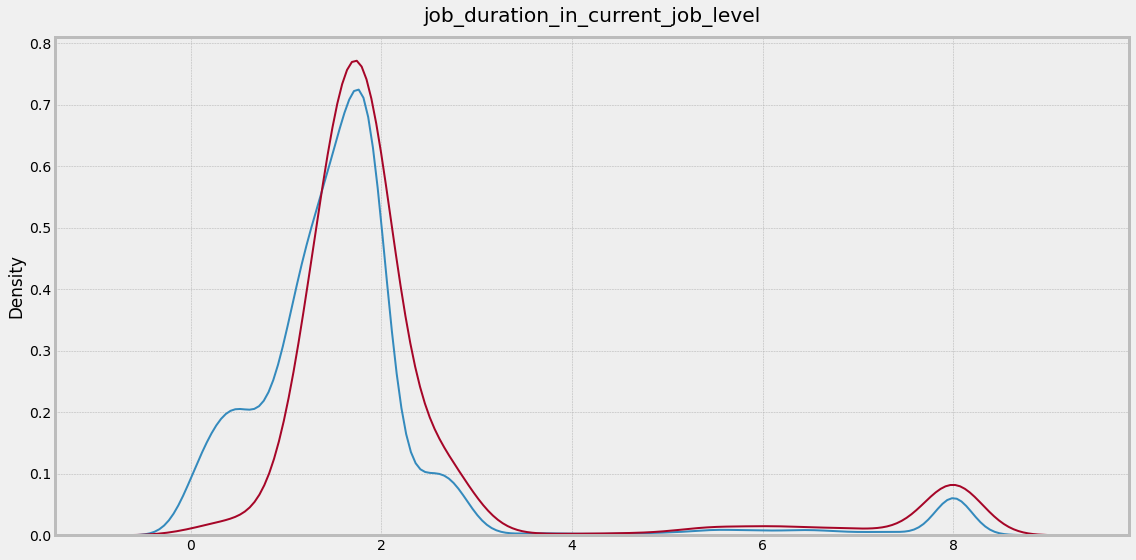

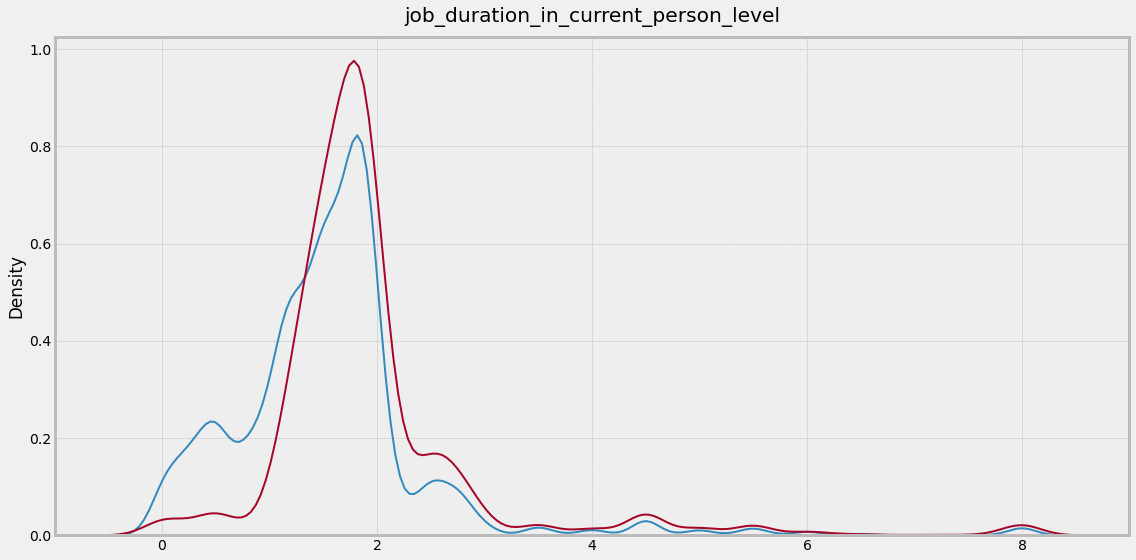

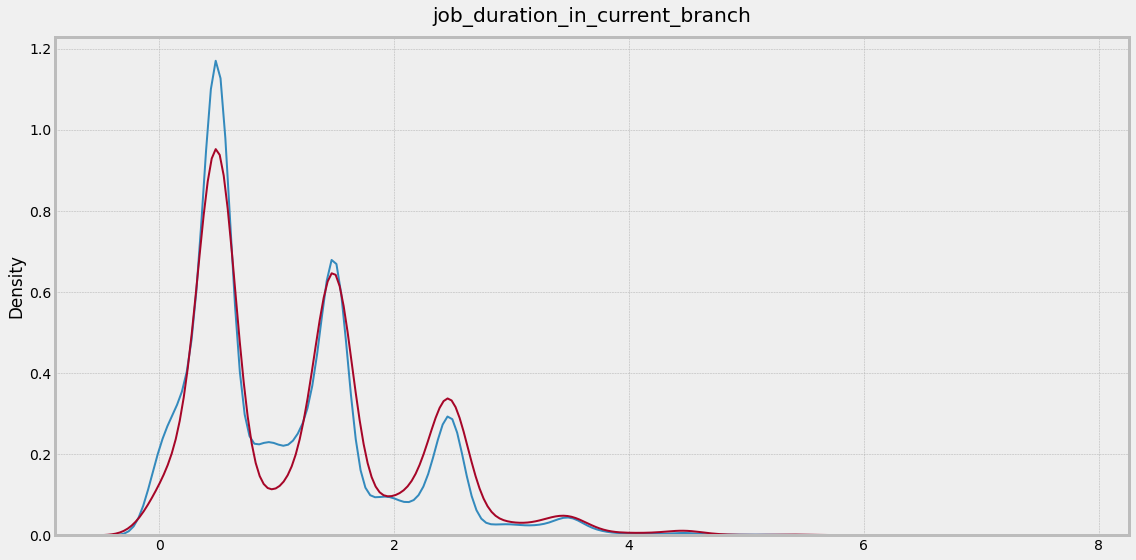

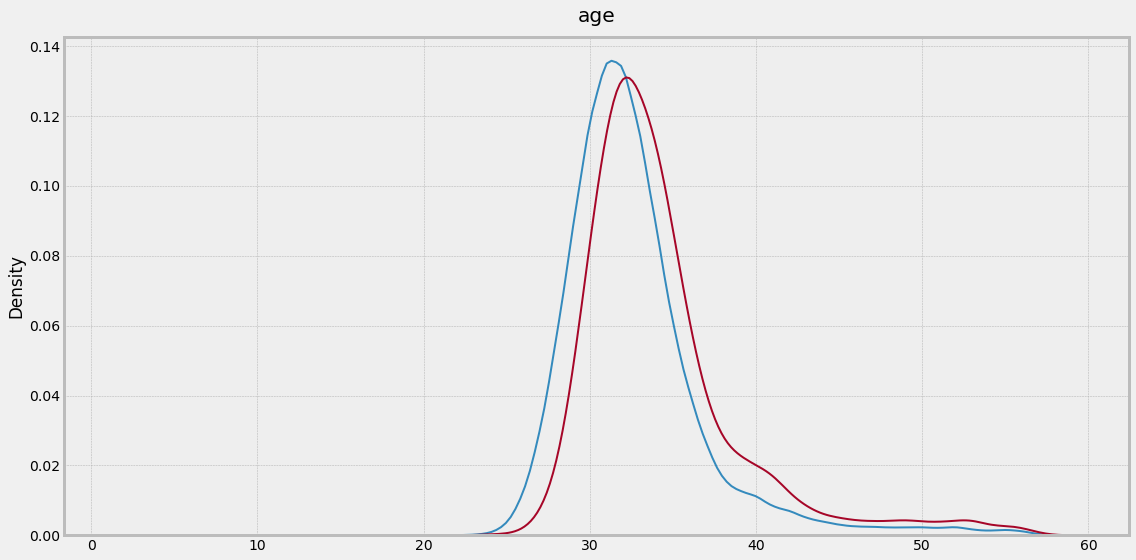

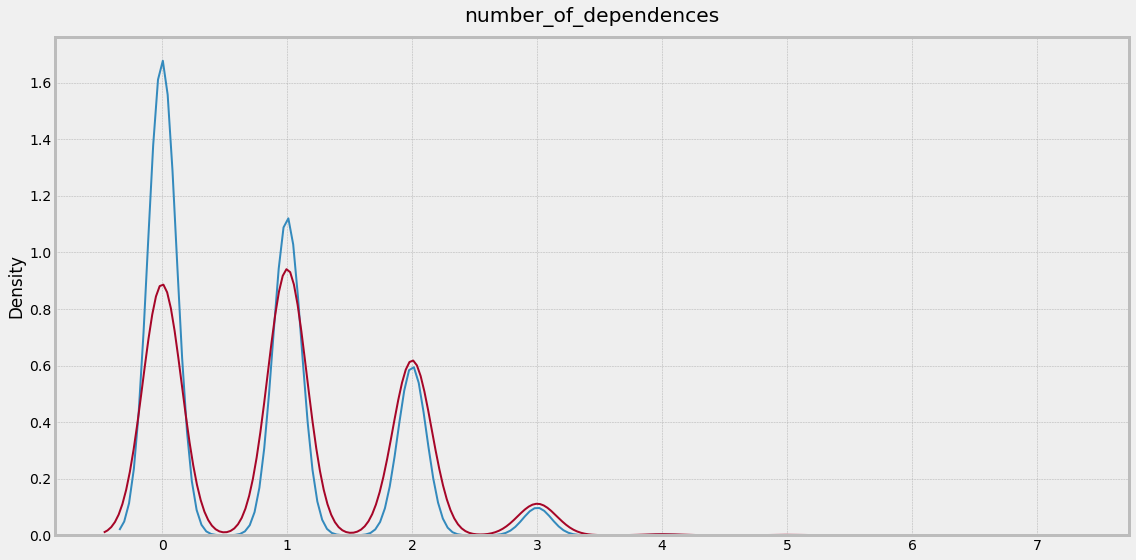

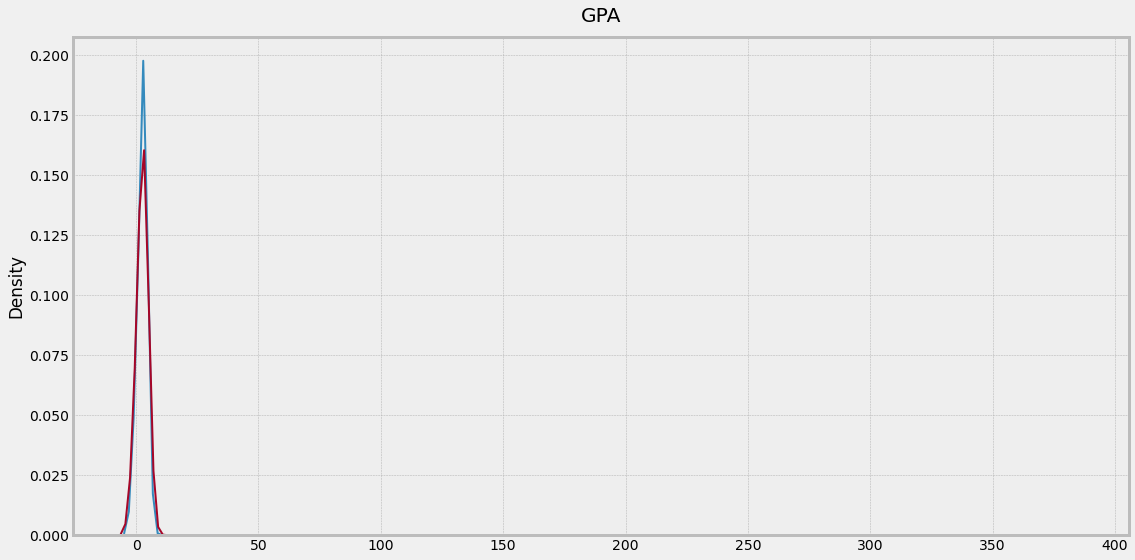

In [26]:
plt.style.use('bmh')
for col in ['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA']:
    
    try:
        sns.distplot(train_df[col], hist=False, label='Train')
        sns.distplot(test_df[col], hist=False, label='Test')
        
        plt.xlabel(None)
        plt.title(col, pad=15)
        plt.tight_layout()
        plt.show()
        
    except:
        continue

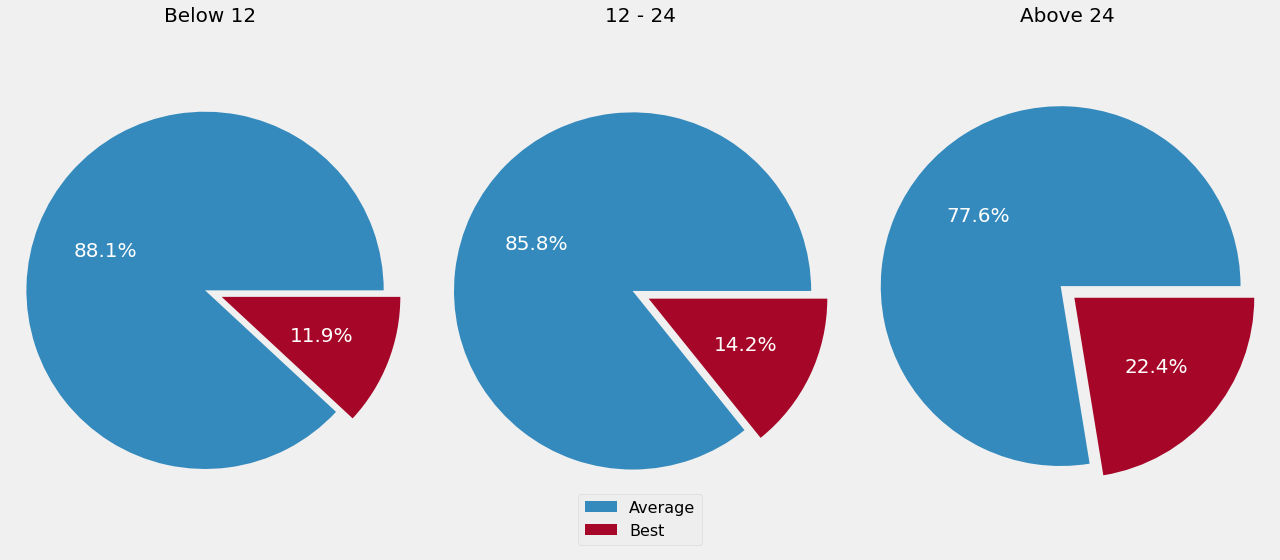

In [27]:
jobdur_from_training_under12 = train_df[train_df['job_duration_from_training'] <= 12]['Best Performance'].value_counts()
jobdur_from_training_up12un24 = train_df[(train_df['job_duration_from_training'] > 12) & (train_df['job_duration_from_training'] < 24)]['Best Performance'].value_counts()
jobdur_from_training_up24 = train_df[train_df['job_duration_from_training'] >= 24]['Best Performance'].value_counts()

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))

ax1.pie(jobdur_from_training_under12.values,
        labels=jobdur_from_training_under12.index,
        autopct='%.1f%%',
        textprops={'fontsize': 20, 'color': 'white'},
        labeldistance=None,
        explode=(0.1, 0)
)

ax2.pie(jobdur_from_training_up12un24.values,
        labels=jobdur_from_training_up12un24.index,
        autopct='%.1f%%',
        textprops={'fontsize': 20, 'color': 'white'},
        labeldistance=None,
        explode=(0.1, 0)
)

ax3.pie(jobdur_from_training_up24.values,
        labels=jobdur_from_training_up24.index,
        autopct='%.1f%%',
        textprops={'fontsize': 20, 'color': 'white'},
        labeldistance=None,
        explode=(0.1, 0)
)

ax1.set_title('Below 12 ', fontsize=20)
ax2.set_title('12 - 24', fontsize=20)
ax3.set_title('Above 24', fontsize=20)

ax2.legend(['Average', 'Best'], fontsize=16, loc=8)

ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')

plt.tight_layout()
plt.show()


In [29]:
print('Minimal value:', train_df['job_duration_as_permanent_worker'].min())
print('Maximal value:', train_df['job_duration_as_permanent_worker'].max())
print('--------------------------------------------------------------------------------------------------------------')
print('job_duration_as_permanent_worker (below 12):', train_df[train_df['job_duration_as_permanent_worker'] <= 12]['Best Performance'].mean() * 100)
print('job_duration_as_permanent_worker (12 to 24):', train_df[(train_df['job_duration_as_permanent_worker'] > 12) & (train_df['job_duration_from_training'] < 24)]['Best Performance'].mean() * 100)
print('job_duration_as_permanent_worker (above 24):', train_df[train_df['job_duration_as_permanent_worker'] >= 24]['Best Performance'].mean() * 100)

Minimal value: 1.0
Maximal value: 34.0
--------------------------------------------------------------------------------------------------------------
job_duration_as_permanent_worker (below 12): 13.211019104833035
job_duration_as_permanent_worker (12 to 24): 14.44976076555024
job_duration_as_permanent_worker (above 24): 22.424242424242426
